# Decision Trees on Breast cancer Dataset

### Package

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn import metrics, datasets
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Dataset Preprocess

Step 1: Convert dataset to pandas dataframe

In [2]:
def convert(breast_cancer):
    data = np.c_[breast_cancer.data, breast_cancer.target]
    columns = np.append(breast_cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

Step 2: Split features and target

In [3]:
def splits_X_y(breast_cancer):
    cancer_data = convert(breast_cancer)
    X = cancer_data[cancer_data.columns[:-21]] # We keep only the first 10 features.
    y = cancer_data.target
    return X, y

Step 3: Split Trainset / Testset

In [4]:
def split_Test_Train(breast_cancer):
    X, y = splits_X_y(breast_cancer)
    return train_test_split(X, y, test_size=0.25, random_state=42)

Step 4: Apply Standardization

In [5]:
def Scaller(X_train,X_test):
    Standar_Scaller = StandardScaler()
    scalled_train_data= Standar_Scaller.fit_transform(X_train)
    scalled_test_data = Standar_Scaller.transform(X_test)
    return scalled_train_data,scalled_test_data

## DecisionTree Classifier

Step 1: Evaluation with testset and calculation of the neccesary metrics 

In [6]:
def evaluation_tree(X_train,X_test,y_train,y_test,criterions,max_depths):
    for criterion in criterions:
        for depht in max_depths:
            print ('\nCriterion =', criterion, '& Max_Depth =', depht )
            Classifier = DecisionTreeClassifier(criterion=criterion, max_depth=depht, random_state=42)
            Classifier.fit(X_train, y_train)
            y_predicted = Classifier.predict(X_test)
            print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted))
            print("Precision: %2f" % metrics.precision_score(y_test, y_predicted, average="macro"))
            print("Recall: %2f" % metrics.recall_score(y_test, y_predicted, average="macro"))
            print("F1: %2f" % metrics.f1_score(y_test, y_predicted, average="macro"))

Step 2: Plot Tree

In [7]:
def plot_tree_clf(X_train,y_train,breast_cancer):
    Classifier = DecisionTreeClassifier(max_depth=3)
    Classifier.fit(X_train,y_train)
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(Classifier,filled=True,feature_names=breast_cancer.feature_names,
                   class_names=breast_cancer.target_names)
    fig.savefig("Decistion_Tree.png")

### DecisionTree Merged

Step 3: Merge all above steps

In [8]:
def final_decisiontree(X_train,X_test,y_train,y_test,breast_cancer):
    criterions = ['gini', 'entropy','log_loss'] 
    max_depths = [3,25]
    print ("Evaluation of Decission Tree Classifier on Testset:\n")
    evaluation_tree(X_train,X_test,y_train,y_test,criterions,max_depths)
    print ("\nDecission Tree Plot:\n")
    plot_tree_clf(X_train,y_train,breast_cancer)

## RandomForest Classifier

Step 1: Evaluate RandomForest with test set with 4 metrics using different hyperparameters

In [9]:
def evaluation_forest(X_train,X_test,y_train,y_test,criterions,n_estimators):
    for criterion in criterions:
        for estimators in n_estimators:
            print ('\nCriterion =', criterion, '& Number of Estimators =', estimators )
            Classifier = RandomForestClassifier(random_state=42,criterion=criterion, n_estimators = estimators)
            Classifier.fit(X_train, y_train)
            y_predicted = Classifier.predict(X_test)
            print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted))
            print("Precision: %2f" % metrics.precision_score(y_test, y_predicted, average="macro"))
            print("Recall: %2f" % metrics.recall_score(y_test, y_predicted, average="macro"))
            print("F1: %2f" % metrics.f1_score(y_test, y_predicted, average="macro"))

Step 2: Calculate metrics using n_estiamtors hyperparameter in a range of 0 to 200.

In [10]:
def calculate_metrics(X_train,X_test,y_train,y_test,metric_names):
    accuracy_score = []
    recall_score = []
    precision_score = []
    f1_score = []
    for estimators in range (1,201):
        Classifier = RandomForestClassifier(random_state=42,criterion='gini', n_estimators = estimators)
        Classifier.fit(X_train, y_train)
        y_predicted = Classifier.predict(X_test)
        accuracy_score.append(metrics.accuracy_score(y_test, y_predicted))
        recall_score.append(metrics.recall_score(y_test, y_predicted))
        precision_score.append(metrics.precision_score(y_test, y_predicted))
        f1_score.append(metrics.f1_score(y_test, y_predicted))
        
        # Get a dictionary with metrics names as keys, and metrcis result list as values.
        f = lambda s: f"dict({ ','.join( f'{k}={k}' for k in s.split(',') ) })"
        metrics_dict = eval(f(metric_names))
    return metrics_dict

Step 3: Plot the meterics change using different values of n_estimators.

In [11]:
def get_plot(X_train,X_test,y_train,y_test,metric_names):
    metrics_dict = calculate_metrics(X_train,X_test,y_train,y_test,metric_names)  
    for name, score in metrics_dict.items():
        plt.plot(range(1, len(score) + 1), score,label=name)
        plt.title(name + ' on 200 estimators' )
        plt.xlabel('Number of Estimators')
        plt.ylabel(name)
        plt.legend()
        plt.savefig(name + '_plot.pdf')
        plt.show()

### RandomForest Merged

Step 4: Merge all above steps

In [12]:
def final_randomforest(X_train,X_test,y_train,y_test):
    criterions = ['gini', 'entropy','log_loss'] 
    n_estimators = [5,25]
    metric_names ='accuracy_score,recall_score,precision_score,f1_score'
    print ("Evaluation of Random Forest Classifier on Test set:\n")
    evaluation_forest(X_train,X_test,y_train,y_test,criterions,n_estimators)
    print ("\nMetrics over Estimators Plot:\n")
    get_plot(X_train,X_test,y_train,y_test,metric_names)

## Output

### Data Preprocess

In [13]:
breast_cancer = datasets.load_breast_cancer()
X_train,X_test,y_train,y_test =  split_Test_Train(breast_cancer)
X_train,X_test = Scaller(X_train,X_test)

### Output for Decission Tree

Evaluation of Decission Tree Classifier on Testset:


Criterion = gini & Max_Depth = 3
Accuracy: 0.937063
Precision: 0.928773
Recall: 0.942156
F1: 0.934165

Criterion = gini & Max_Depth = 25
Accuracy: 0.902098
Precision: 0.893002
Recall: 0.903142
F1: 0.897270

Criterion = entropy & Max_Depth = 3
Accuracy: 0.909091
Precision: 0.900198
Recall: 0.919684
F1: 0.905983

Criterion = entropy & Max_Depth = 25
Accuracy: 0.916084
Precision: 0.910737
Recall: 0.910737
F1: 0.910737

Criterion = log_loss & Max_Depth = 3
Accuracy: 0.909091
Precision: 0.900198
Recall: 0.919684
F1: 0.905983

Criterion = log_loss & Max_Depth = 25
Accuracy: 0.916084
Precision: 0.910737
Recall: 0.910737
F1: 0.910737

Decission Tree Plot:



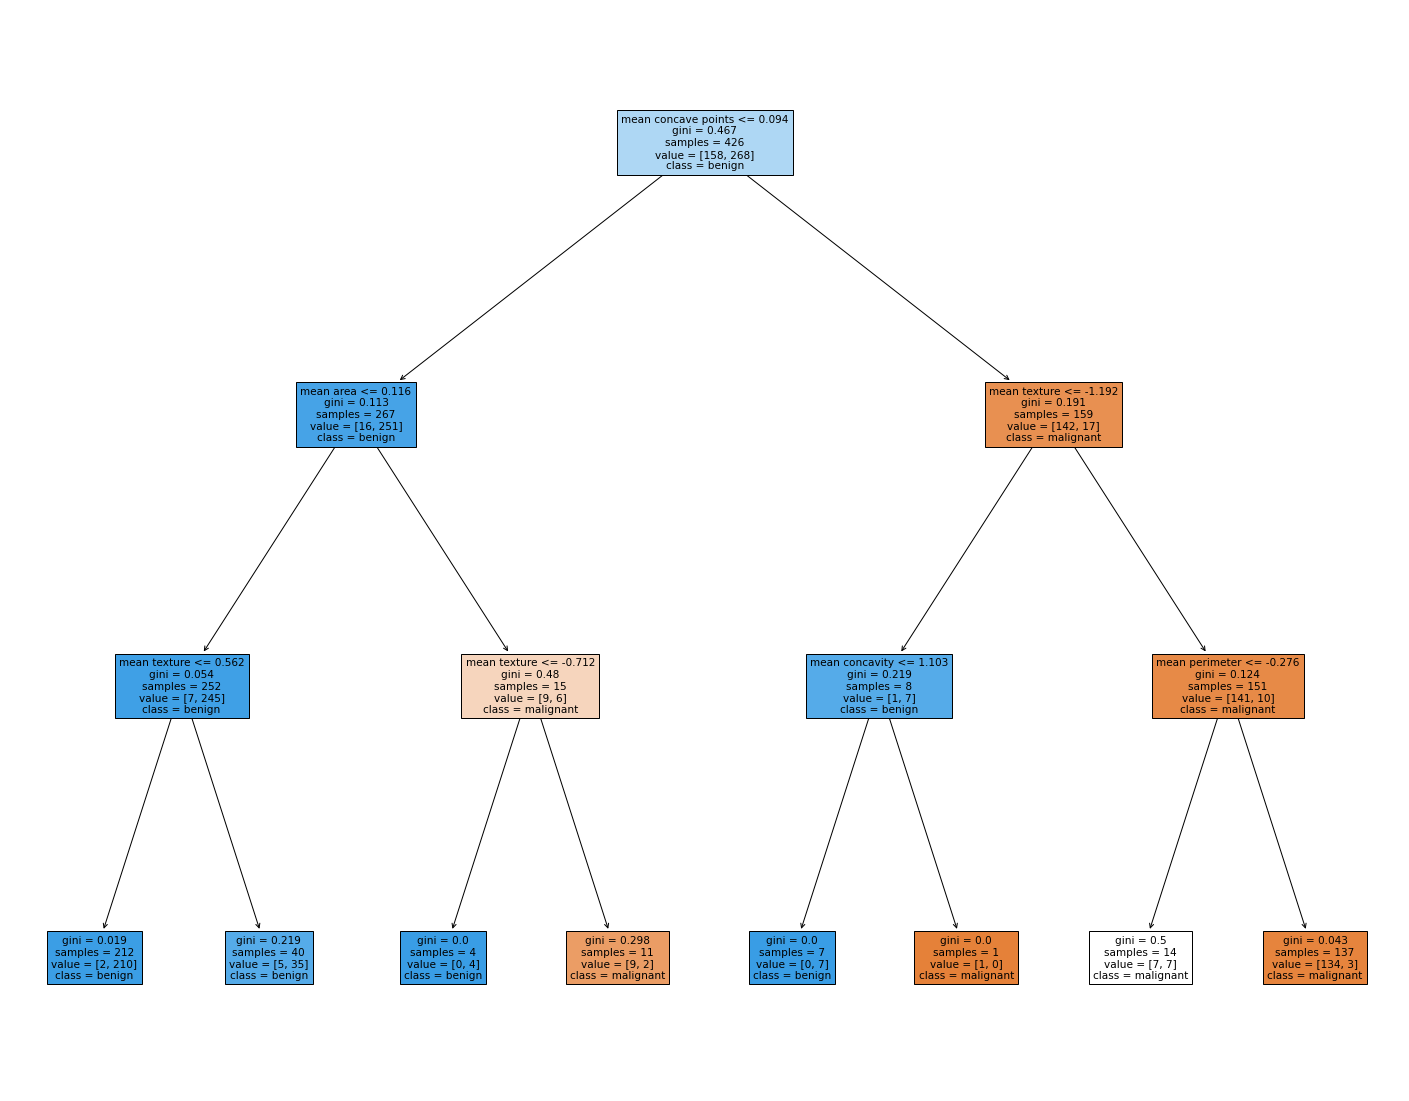

In [14]:
final_decisiontree(X_train,X_test,y_train,y_test,breast_cancer)

### Output for Random Forest

Evaluation of Random Forest Classifier on Test set:


Criterion = gini & Number of Estimators = 5
Accuracy: 0.951049
Precision: 0.944512
Recall: 0.953392
F1: 0.948468

Criterion = gini & Number of Estimators = 25
Accuracy: 0.951049
Precision: 0.943200
Recall: 0.957033
F1: 0.948795

Criterion = entropy & Number of Estimators = 5
Accuracy: 0.979021
Precision: 0.973684
Recall: 0.983146
F1: 0.977915

Criterion = entropy & Number of Estimators = 25
Accuracy: 0.951049
Precision: 0.944512
Recall: 0.953392
F1: 0.948468

Criterion = log_loss & Number of Estimators = 5
Accuracy: 0.979021
Precision: 0.973684
Recall: 0.983146
F1: 0.977915

Criterion = log_loss & Number of Estimators = 25
Accuracy: 0.951049
Precision: 0.944512
Recall: 0.953392
F1: 0.948468

Metrics over Estimators Plot:



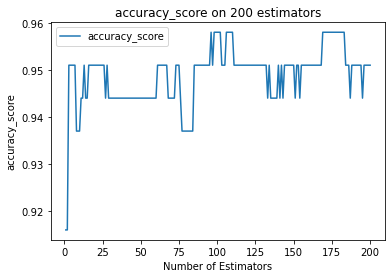

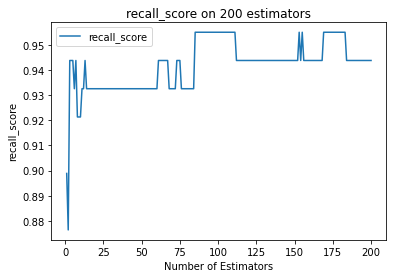

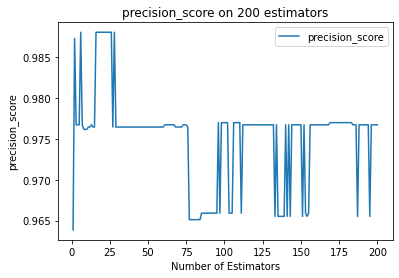

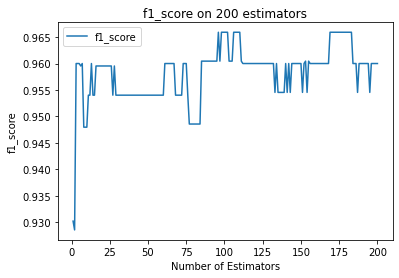

In [15]:
final_randomforest(X_train,X_test,y_train,y_test)